In [28]:
from collections import defaultdict
import numpy as np

quarter = [
    "1992K2","1992K3","1992K4","1993K1","1993K2","1993K3","1993K4",
    "1994K1","1994K2","1994K3","1994K4","1995K1","1995K2","1995K3","1995K4",
    "1996K1","1996K2","1996K3","1996K4","1997K1","1997K2","1997K3","1997K4",
    "1998K1","1998K2","1998K3","1998K4","1999K1","1999K2","1999K3","1999K4",
    "2000K1","2000K2","2000K3","2000K4","2001K1","2001K2","2001K3","2001K4",
    "2002K1","2002K2","2002K3","2002K4","2003K1","2003K2","2003K3","2003K4",
    "2004K1","2004K2","2004K3","2004K4","2005K1","2005K2","2005K3","2005K4",
    "2006K1","2006K2","2006K3","2006K4","2007K1","2007K2","2007K3","2007K4",
    "2008K1","2008K2","2008K3","2008K4","2009K1","2009K2","2009K3","2009K4",
    "2010K1","2010K2","2010K3","2010K4","2011K1","2011K2","2011K3","2011K4",
    "2012K1","2012K2","2012K3","2012K4","2013K1","2013K2","2013K3","2013K4",
    "2014K1","2014K2","2014K3","2014K4","2015K1","2015K2","2015K3","2015K4",
    "2016K1","2016K2","2016K3","2016K4","2017K1","2017K2","2017K3","2017K4",
    "2018K1","2018K2","2018K3","2018K4","2019K1","2019K2","2019K3","2019K4",
    "2020K1","2020K2","2020K3","2020K4","2021K1","2021K2","2021K3","2021K4",
    "2022K1","2022K2","2022K3","2022K4","2023K1","2023K2","2023K3","2023K4",
    "2024K1","2024K2","2024K3","2024K4"
]

In [29]:
# RegionH
change = [
    -2.4,-4.0,-4.2,-1.8,-0.9,5.4,3.4,6.6,-2.3,-0.8,0.0,1.6,4.7,2.3,2.9,2.9,
    2.8,2.7,3.3,3.2,3.7,3.0,1.7,5.1,5.4,3.6,4.0,3.3,5.1,3.9,1.3,5.4,3.6,3.4,
    3.7,5.0,4.1,3.6,0.9,4.4,3.6,2.3,-0.3,5.1,0.5,1.3,-1.8,3.2,3.9,3.0,4.4,6.8,
    9.0,8.6,7.0,7.6,8.5,0.7,-4.0,-4.1,-1.8,-1.8,-4.6,-1.2,-3.2,-4.7,-5.1,
    -10.8,2.0,0.7,2.0,2.4,2.7,0.6,1.0,0.8,1.0,-5.1,-0.8,0.6,1.0,3.3,0.4,3.2,
    4.0,0.2,2.2,4.2,2.3,1.0,0.5,4.3,5.1,2.0,1.0,3.2,1.9,1.4,1.4,2.3,3.1,2.1,
    0.5,2.8,2.2,-0.7,-1.7,1.0,1.1,-0.8,1.3,1.8,0.8,2.9,2.5,5.9,2.4,2.1,-0.5,
    2.5,1.5,-3.5,-4.9,-0.8,3.2,1.4,0.1,-0.7,3.5,2.6,1.8
]
#2800
#change = [
#    7968,8055,7980,8005,7345,7113,7443,7697,9385,7684,9265,7634,7415,7212,7597,8042,7716,8330,8805,9082,8671,8753,9661,10636,11307,11015,11200,11813,12156,13065,13206,13269,13255,13920,14229,14800,15149,15355,16770,15478,15572,17203,17591,17007,15663,17857,18530,18400,18469,20242,19083,19438,22350,23161,25103,27726,28968,32393,31324,29832,26615,28617,26316,24390,26326,23699,21326,18755,17575,18150,20157,20642,19645,22333,19697,21506,21935,21777,19973,17938,20343,19150,18862,21433,22584,20593,20829,25334,25001,25158,23132,25778,24553,26065,27332,27331,27211,28095,27903,28493,28784,30424,31787,30963,31881,31141,30815,31083,30687,31349,32919,33884,32625,34328,35195,35539,37398,39658,40704,37379,38649,39907,37033,36903,34891,37930,37984,38796,42415,41482,40634,39700
#]
#change = [(p2 - p1) / p1 * 100 for p1, p2 in zip(change[:-1], change[1:])]
##regionH
#change = [
#6385,6317,6200,5907,5800,5898,6185,5945,6113,6047,6044,5958,6033,6142,6373,6360,6564,7019,6926,6946,7369,7768,7934,8243,8627,9074,9314,9690,10301,10879,11239,11390,11695,12261,12508,12906,13521,14268,14853,14892,15445,15765,16140,16044,16677,16637,17026,17028,17658,18422,19022,19805,21068,22901,24964,26956,28244,30142,29891,28341,27014,26731,26186,24999,24284,23898,22713,20642,19024,19392,19587,20459,20746,21545,21413,21624,21870,21454,20375,20098,20271,20427,20704,21188,21867,22802,23267,23474,23735,24530,24605,24887,26139,27628,27773,28300,28839,30033,30477,30926,31719,32961,34021,33957,34931,35227,35239,34647,35038,35268,35394,35879,36257,37055,37903,39450,41453,43383,44071,43762,45092,45568,43142,40301,40349,41564,43442,43779,43119,45016,45534,47086]
#change = [(p2 - p1) / p1 * 100 for p1, p2 in zip(change[:-1], change[1:])]


In [30]:
# === SET THIS ===
x = 4  # number of years to look back

# Extract year and keep only quarters from the last x years
years = [int(q[:4]) for q in quarter]
latest_year = max(years)
min_year = latest_year - x + 1

# Filter data
filtered = [(q, c) for q, c in zip(quarter, change) if int(q[:4]) >= min_year]


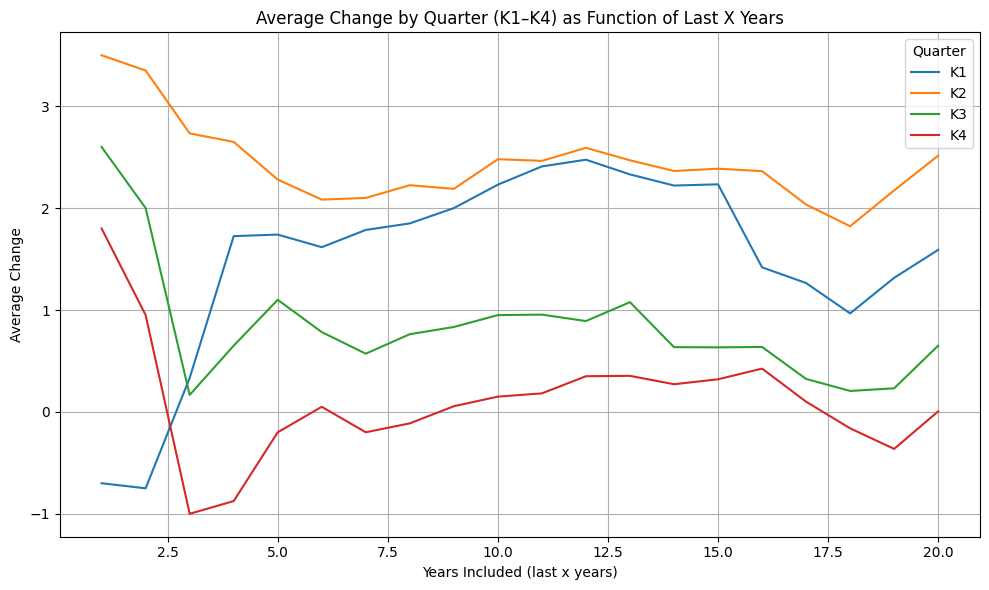

In [31]:

import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np

# Container to hold results
x_range = range(1, 21)
results = {'K1': [], 'K2': [], 'K3': [], 'K4': []}

# Years in the data
years = [int(q[:4]) for q in quarter]
latest_year = max(years)

for x in x_range:
    min_year = latest_year - x + 1
    filtered = [(q, c) for q, c in zip(quarter, change) if int(q[:4]) >= min_year]

    quarter_groups = defaultdict(list)
    for q, c in filtered:
        k = q[-2:]
        quarter_groups[k].append(c)

    for k in ['K1', 'K2', 'K3', 'K4']:
        values = quarter_groups.get(k, [])
        mean_value = np.mean(values) if values else np.nan
        results[k].append(mean_value)

# Plotting
plt.figure(figsize=(10, 6))
for k in results:
    plt.plot(x_range, results[k], label=f"{k}")

plt.title("Average Change by Quarter (K1–K4) as Function of Last X Years")
plt.xlabel("Years Included (last x years)")
plt.ylabel("Average Change")
plt.legend(title="Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
k4_changes = [c for q, c in zip(quarter, change) if q[-2:] == "K4"]

import numpy as np
mean_k4 = np.mean(k4_changes)
std_k4 = np.std(k4_changes)

print(f"Historical K4 average: {mean_k4:.2f}")
print(f"Historical K4 standard deviation: {std_k4:.2f}")


Historical K4 average: 0.59
Historical K4 standard deviation: 2.80


In [33]:
latest_year = max(int(q[:4]) for q in quarter)
recent_k4_changes = [c for q, c in zip(quarter, change) if q[-2:] == "K4" and int(q[:4]) > latest_year - 5]

mean_recent_k4 = np.mean(recent_k4_changes)
print(f"Recent (last 5 years) K4 avg: {mean_recent_k4:.2f}")

Recent (last 5 years) K4 avg: -0.20


In [34]:
import numpy as np
from sklearn.linear_model import LinearRegression

k4_years = np.array([int(q[:4]) for q in quarter if q[-2:] == "K4"]).reshape(-1, 1)
k4_values = np.array([c for q, c in zip(quarter, change) if q[-2:] == "K4"])

model = LinearRegression()
model.fit(k4_years, k4_values)

pred_2025k4 = model.predict(np.array([[2025]]))[0]
print(f"Predicted K4 change in 2025: {pred_2025k4:.2f}")

Predicted K4 change in 2025: -0.32


In [35]:
hej5=k4_values[-5:]
hej10=k4_values[-10:]
hej15=k4_values[-15:]

C:\Users\Asbjorn Jespersen\AppData\Local\Temp\ipykernel_22156\888463574.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Quarter")


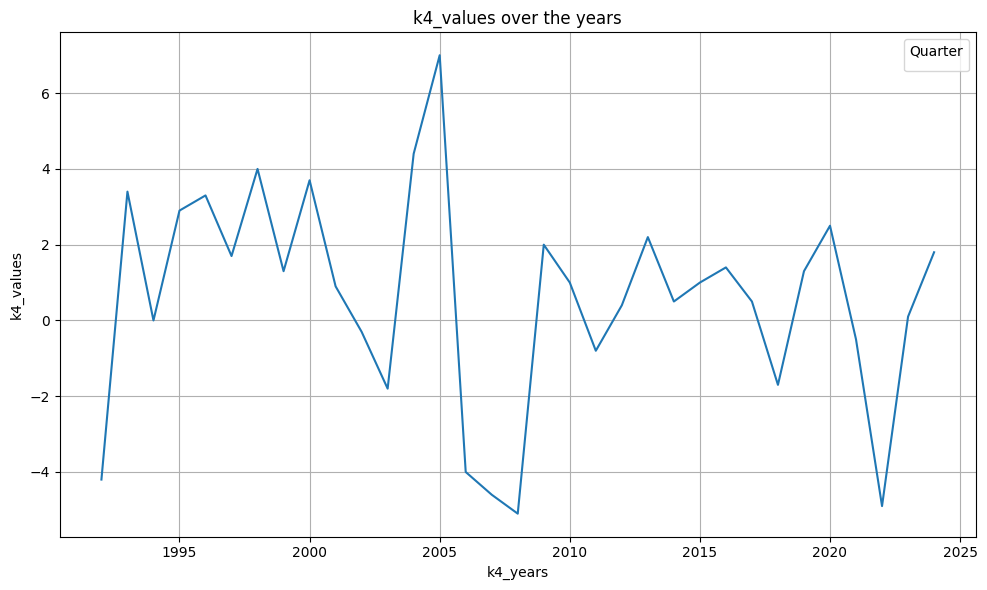

In [36]:
# Plotting
plt.figure(figsize=(10, 6))
#for k in results:
plt.plot(k4_years, k4_values) #label=f"{k}")

plt.title("k4_values over the years")
plt.xlabel("k4_years")
plt.ylabel("k4_values")
plt.legend(title="Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()

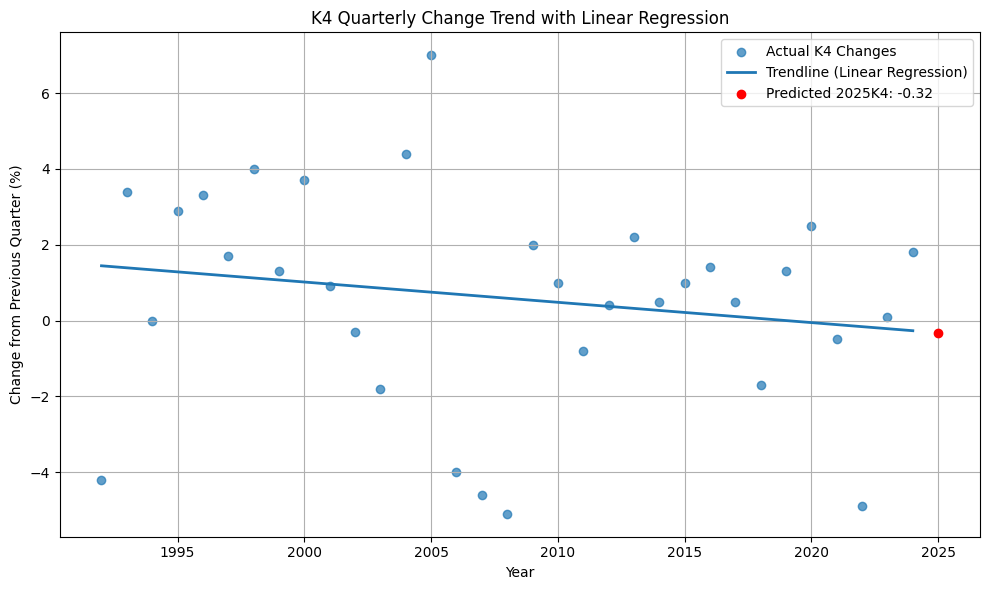

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Filter out K4 years and values
k4_years = np.array([int(q[:4]) for q in quarter if q[-2:] == "K4"]).reshape(-1, 1)
k4_values = np.array([c for q, c in zip(quarter, change) if q[-2:] == "K4"])

# Train linear regression model
model = LinearRegression()
model.fit(k4_years, k4_values)

# Predict values using the model
k4_predicted = model.predict(k4_years)

# Predict 2025 K4
year_2025 = np.array([[2025]])
predicted_2025 = model.predict(year_2025)[0]

# Plot actual values
plt.figure(figsize=(10, 6))
plt.scatter(k4_years, k4_values, label="Actual K4 Changes", alpha=0.7)
plt.plot(k4_years, k4_predicted, label="Trendline (Linear Regression)", linewidth=2)

# Highlight prediction for 2025
plt.scatter([2025], [predicted_2025], color='red', label=f"Predicted 2025K4: {predicted_2025:.2f}", zorder=5)

plt.title("K4 Quarterly Change Trend with Linear Regression")
plt.xlabel("Year")
plt.ylabel("Change from Previous Quarter (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


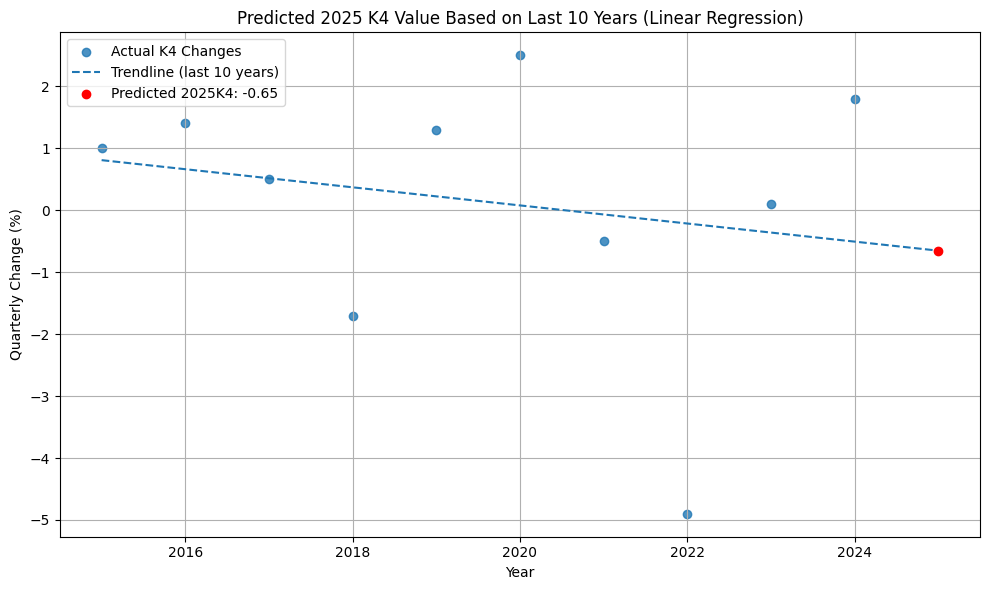

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === SET THIS ===
x =10  # number of years to look back

# Filter K4 quarters and extract years/values
k4_data = [(int(q[:4]), c) for q, c in zip(quarter, change) if q[-2:] == "K4"]
latest_year = max(y for y, _ in k4_data)
min_year = latest_year - x + 1

# Keep only last x years
filtered_k4 = [(y, c) for y, c in k4_data if y >= min_year]

# Separate into X and y for regression
years = np.array([y for y, _ in filtered_k4]).reshape(-1, 1)
values = np.array([c for _, c in filtered_k4])

# Train model
model = LinearRegression()
model.fit(years, values)

# Predict for 2025
predicted_2025 = model.predict(np.array([[2025]]))[0]

# Predict trend line for plotting
line_x = np.append(years.flatten(), 2025).reshape(-1, 1)
line_y = model.predict(line_x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(years, values, label="Actual K4 Changes", alpha=0.8)
plt.plot(line_x, line_y, label=f"Trendline (last {x} years)", linestyle='--')
plt.scatter([2025], [predicted_2025], color='red', label=f"Predicted 2025K4: {predicted_2025:.2f}", zorder=5)

plt.title(f"Predicted 2025 K4 Value Based on Last {x} Years (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Quarterly Change (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


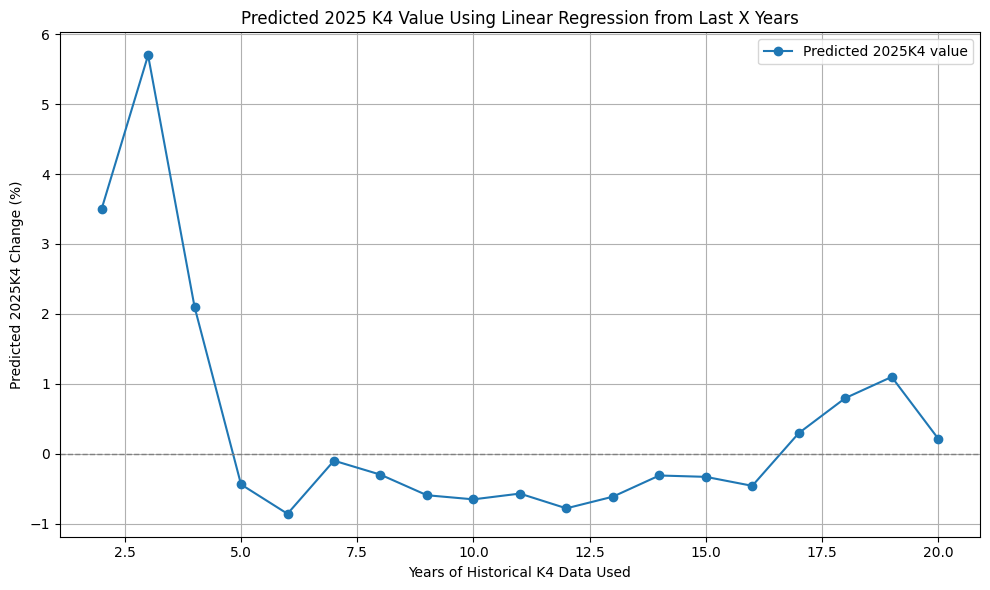

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# All K4 data (year and value)
k4_data = [(int(q[:4]), c) for q, c in zip(quarter, change) if q[-2:] == "K4"]
k4_data.sort()  # ensure chronological order
latest_year = max(y for y, _ in k4_data)

# Store predictions
x_range = range(1, 21)
predictions = []

for x in x_range:
    # Filter last x years of K4 data
    min_year = latest_year - x + 1
    filtered = [(y, c) for y, c in k4_data if y >= min_year]

    # Only fit if we have enough data
    if len(filtered) >= 2:
        years = np.array([y for y, _ in filtered]).reshape(-1, 1)
        values = np.array([c for _, c in filtered])

        model = LinearRegression()
        model.fit(years, values)
        predicted_2025 = model.predict(np.array([[2025]]))[0]
    else:
        predicted_2025 = np.nan  # not enough data to fit

    predictions.append(predicted_2025)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_range, predictions, marker='o', label="Predicted 2025K4 value")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("Predicted 2025 K4 Value Using Linear Regression from Last X Years")
plt.xlabel("Years of Historical K4 Data Used")
plt.ylabel("Predicted 2025K4 Change (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


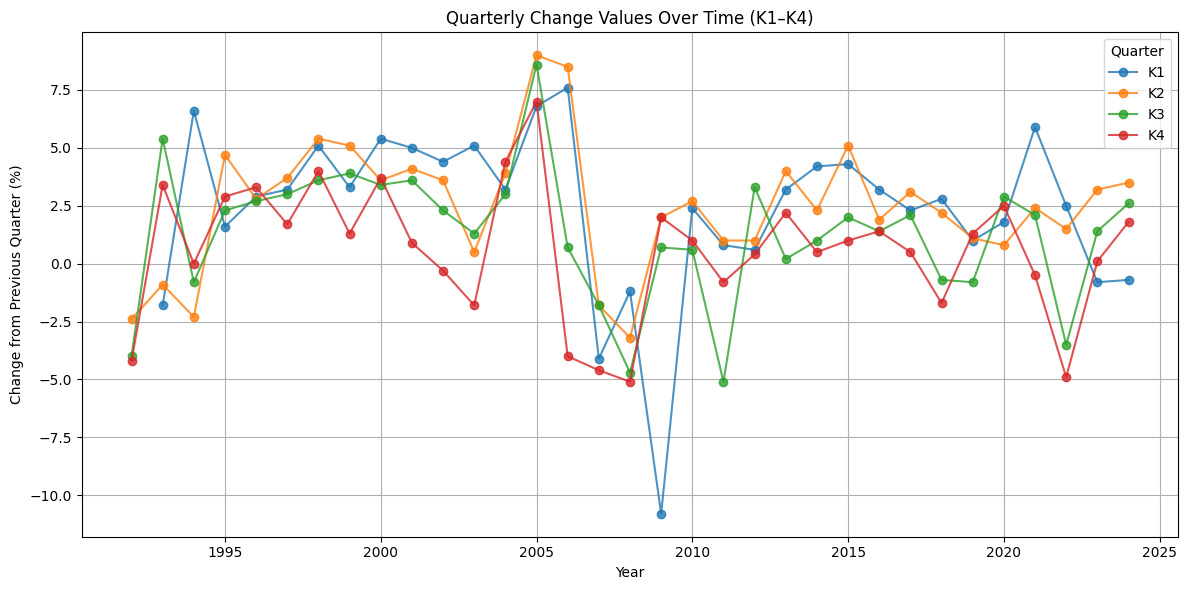

Mean K1: 2.37
Mean K2: 2.49
Mean K3: 1.29
Mean K4: 0.59


In [40]:
import matplotlib.pyplot as plt

# Extract year and quarter type for each entry
k_values = {'K1': [], 'K2': [], 'K3': [], 'K4': []}
years_k = {'K1': [], 'K2': [], 'K3': [], 'K4': []}

for q, c in zip(quarter, change):
    k = q[-2:]
    year = int(q[:4])
    if k in k_values:
        k_values[k].append(c)
        years_k[k].append(year)

# Plot all quarters
plt.figure(figsize=(12, 6))
for k in ['K1', 'K2', 'K3', 'K4']:
    plt.plot(years_k[k], k_values[k], label=k, marker='o', alpha=0.8)

plt.title("Quarterly Change Values Over Time (K1–K4)")
plt.xlabel("Year")
plt.ylabel("Change from Previous Quarter (%)")
plt.legend(title="Quarter")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Mean K1: {np.mean(k_values['K1']):.2f}")
print(f"Mean K2: {np.mean(k_values['K2']):.2f}")
print(f"Mean K3: {np.mean(k_values['K3']):.2f}")
print(f"Mean K4: {np.mean(k_values['K4']):.2f}")